## ECS7024 Statistics for AI and Data Science - Coursework 4

### 3 Part 2: Additional Analysis of the Storks Data


### Content

1. Section 1: Introduction

2. Section 2: Load and Review the Data

3. Section 3: Regression Models for the Number of Births

4. Section 4: Use the Bootstrap Technique to Construct Confidence Intervals
    1. Section 4.1: Confidence Intervals for the Predictors Weights (‘beta’) in Model 2
    2. Section 4.2: Confidence Interval for the Difference in Performance of the Two Models

5. Section 5: Conclusions

6. Section 6: Acknowledgments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   # this is an additional plotting library

from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Section 1: Introduction

This coursework delves into stork-related data analysis originates from Robert Matthews' paper, "Storks Deliver Babies (p = 0.008),". It involves data loading, the development and comparison of regression models, and the application of the bootstrap technique for constructing confidence intervals. The objective is to identify factors influencing birth rates and critically evaluate a folks tale concerning storks and their role in delivering babies. Through a systematic exploration of statistical methodologies, we aim to derive concise yet insightful conclusions.


## Section 2: Load and Review the Data

In this section, we delve into the analysis of the Storks data, as outlined in the coursework. 

The data, available in CSV format, includes a new variable – GDP per capita. 

To provide a comprehensive overview, we will:

* Load the data and inspect its structure.
* Introduce a new variable representing population density (millions per Km²).
* Document the variables, including their respective units.
* Conduct a review of the data distributions and correlations.

In [2]:
stork = pd.read_csv('storks.csv')
stork

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita
0,Albania,28750,100,3.2,83,3983
1,Austria,83860,300,7.6,87,26930
2,Belgium,30520,1,9.9,118,27412
3,Bulgaria,111000,5000,9.0,117,8922
4,Denmark,43100,9,5.1,59,29412
5,France,544000,140,56.0,774,28129
6,Germany,357000,3300,78.0,901,25391
7,Greece,132000,2500,10.0,106,15964
8,Holland,41900,4,15.0,188,27515
9,Hungary,93000,5000,11.0,124,10296


In [3]:
def calcPopulationDensity(row):
    return row['Humans'] * 1e6 / row['Area'] 

storks2 = stork.assign(Population_Density=stork.apply(calcPopulationDensity, axis=1))
storks2


,Country,Area,Storks,Humans,BirthRate,GDP_per_capita,Population_Density
0,Albania,28750,100,3.2,83,3983,111.304348
1,Austria,83860,300,7.6,87,26930,90.627236
2,Belgium,30520,1,9.9,118,27412,324.377457
3,Bulgaria,111000,5000,9.0,117,8922,81.081081
4,Denmark,43100,9,5.1,59,29412,118.329466
5,France,544000,140,56.0,774,28129,102.941176
6,Germany,357000,3300,78.0,901,25391,218.487395
7,Greece,132000,2500,10.0,106,15964,75.757576
8,Holland,41900,4,15.0,188,27515,357.995227
9,Hungary,93000,5000,11.0,124,10296,118.279570


In [4]:
# Document the variables and their units
variable_units = {
    'Area': 'km²',
    'Storks': 'pairs',
    'Humans': '10^6',
    'BirthRate': '10^3 per year',
    'GDP_per_capita': 'dollars',
    'PopulationDensity': 'millions per km²'
}

# Display variable descriptions
for variable, unit in variable_units.items():
    print((variable), (':'), (unit)) 

Area : km²
Storks : pairs
Humans : 10^6
BirthRate : 10^3 per year
GDP_per_capita : dollars
PopulationDensity : millions per km²


In [5]:
storks2.describe()

,Area,Storks,Humans,BirthRate,GDP_per_capita,Population_Density
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,219674.705882,5059.352941,25.558824,370.705882,19001.764706,142.727096
std,219561.276416,8833.113607,23.528707,410.046303,9813.624423,84.939011
min,28750.000000,1.000000,3.200000,59.000000,3983.000000,71.845532
25%,43100.000000,100.000000,9.000000,106.000000,8922.000000,90.627236
50%,111000.000000,1500.000000,11.000000,124.000000,19215.000000,111.304348
75%,312680.000000,5000.000000,39.000000,551.000000,27412.000000,162.266893
max,779450.000000,30000.000000,78.000000,1576.000000,34250.000000,357.995227


In [6]:
storks2.corr()

C:\Users\steph\AppData\Local\Temp\ipykernel_4376\741954062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  storks2.corr()


,Area,Storks,Humans,BirthRate,GDP_per_capita,Population_Density
Area,1.000000,0.579342,0.812228,0.922544,-0.167741,-0.330140
Storks,0.579342,1.000000,0.354240,0.620265,-0.525765,-0.298310
Humans,0.812228,0.354240,1.000000,0.851209,0.069863,0.020191
BirthRate,0.922544,0.620265,0.851209,1.000000,-0.155945,-0.132259
GDP_per_capita,-0.167741,-0.525765,0.069863,-0.155945,1.000000,0.493016
Population_Density,-0.330140,-0.298310,0.020191,-0.132259,0.493016,1.000000


## Section 3: Regression Models for the Number of Births

The aim is to build and compare two regression models explaining the variability in the number of births:

* Model 1: Using the number of storks as the sole predictor.
* Model 2: Incorporating predictors such as population size, GDP per capita, and population density. The rationale behind each predictor will be explored.

We will visually represent the fit of both models using appropriate plots and metrics, providing concise explanations for their interpretations.

* Model 1

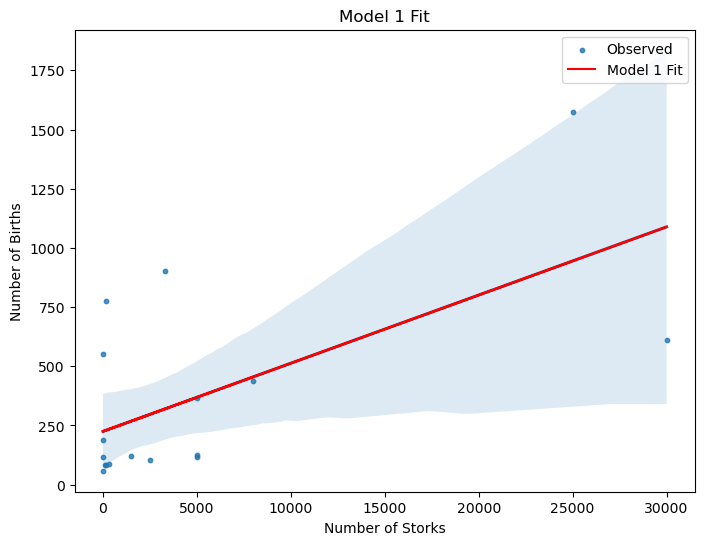

In [7]:
X1 = storks2[['Storks']]
y1 = storks2['BirthRate']
model1 = LinearRegression().fit(X1, y1)

plt.figure(figsize=(8, 6))
sns.regplot(x=storks2['Storks'], y=y1, scatter_kws={'s': 10}, label='Observed')
plt.plot(storks2['Storks'], model1.predict(X1), color='red', label='Model 1 Fit')
plt.title('Model 1 Fit')
plt.xlabel('Number of Storks')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

In [8]:
model1 = LinearRegression().fit(X1, y1)

#Display results for Model 1
print('Model 1 Results:')
print('The R2 coefficient of determination is %4.3f' % model1.score(X1, y1))
print('The intercept is %4.3f' % model1.intercept_)
beta_Storks = model1.coef_[0]
print('Estimated regression coefficient for Storks is %4.3f' % beta_Storks,
      'change in BirthRate per one unit change in Number of Storks')

Model 1 Results:
The R2 coefficient of determination is 0.385
The intercept is 225.029
Estimated regression coefficient for Storks is 0.029 change in BirthRate per one unit change in Number of Storks


* Model 2

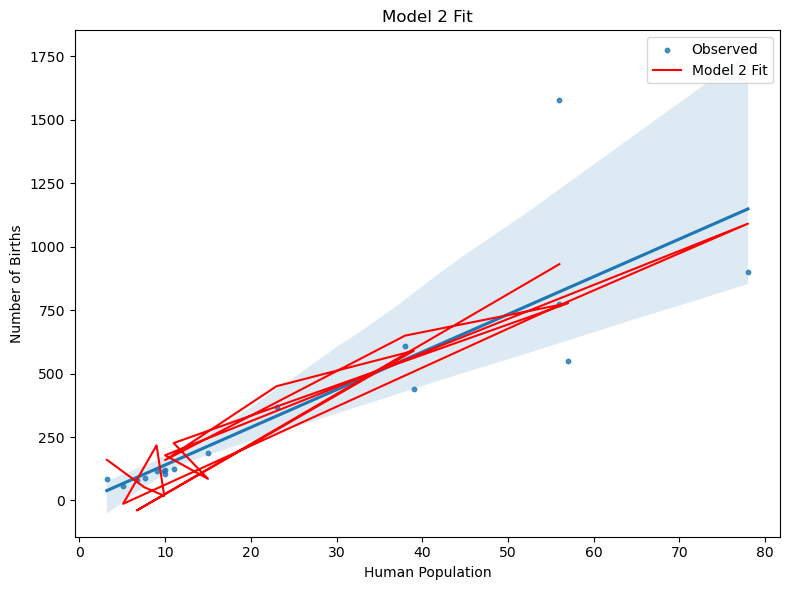

In [9]:
X2 = storks2[['Humans', 'GDP_per_capita', 'Population_Density']]
y2 = storks2['BirthRate']

#Standardise Model 2 features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

model2 = LinearRegression().fit(X2_scaled, y2)

plt.figure(figsize=(8, 6))

sns.regplot(x=storks2['Humans'], y=y2, scatter_kws={'s': 10}, label='Observed')
plt.plot(storks2['Humans'], model2.predict(X2_scaled), color='red', label='Model 2 Fit')
plt.title('Model 2 Fit')
plt.xlabel('Human Population')
plt.ylabel('Number of Births')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
model2 = LinearRegression().fit(X2_scaled, y2)
print('Model 2 Results:')
print('The R2 coefficient of determination is %4.3f' % model2.score(X2_scaled, y2))
print('The intercept is %4.3f' % model2.intercept_)
beta_Humans, beta_GDP, beta_PopDensity = model2.coef_
print('Estimated regression coefficient for Humans is %4.3f' % beta_Humans,
      'change in BirthRate per one standard deviation change in Human population')
print('Estimated regression coefficient for GDP_per_capita is %4.3f' % beta_GDP,
      'change in BirthRate per one standard deviation change in GDP per capita')
print('Estimated regression coefficient for PopulationDensity is %4.3f' % beta_PopDensity,
      'change in BirthRate per one standard deviation change in Population Density')

Model 2 Results:
The R2 coefficient of determination is 0.774
The intercept is 370.706
Estimated regression coefficient for Humans is 344.306 change in BirthRate per one standard deviation change in Human population
Estimated regression coefficient for GDP_per_capita is -74.938 change in BirthRate per one standard deviation change in GDP per capita
Estimated regression coefficient for PopulationDensity is -22.620 change in BirthRate per one standard deviation change in Population Density


## Section 4: Use the Bootstrap Technique to Construct Confidence Intervals

In [11]:
# Define Bootstrap Function
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data=dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(repeats):
        result.iloc[i] = func(resample(data)) 
    return result

In [12]:
def fit_model1(data):
    #Model 1
    X = data[['Storks']]
    y = data['BirthRate']
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model.coef_[0]

def fit_model2(data):
    #Model 2
    X = data[['Humans', 'GDP_per_capita', 'Population_Density']]
    y = data['BirthRate']
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model.coef_

bs_model1 = bootstrapC(storks2, ['Beta_Storks'], 1000, fit_model1)
bs_model2 = bootstrapC(storks2, ['Beta_Humans', 'Beta_GDP_per_capita', 'Beta_Population'], 1000, fit_model2)



In [13]:
bs_model1.mean()

Beta_Storks    0.029082
dtype: float64

In [14]:
bs_model2.mean()

Beta_Humans            15.480933
Beta_GDP_per_capita    -0.007371
Beta_Population        -0.431112
dtype: float64

Implementing the bootstrap technique involves:

* Creating functions for re-sampling and model building.
* Estimating confidence intervals for predictor weights ('beta') in Model 2, focusing on 'GDP per capita' and 'population density'. 
* The process includes fitting the model for each bootstrap sample and plotting the distribution of beta values.

We will determine confidence intervals for the difference in root mean squared error (RMSE) between the two models. 
This involves calculating the RMSE difference for each bootstrap sample and assessing confidence intervals to evaluate the models' predictive performance.

array([[<Axes: title={'center': 'Mean'}>]], dtype=object)

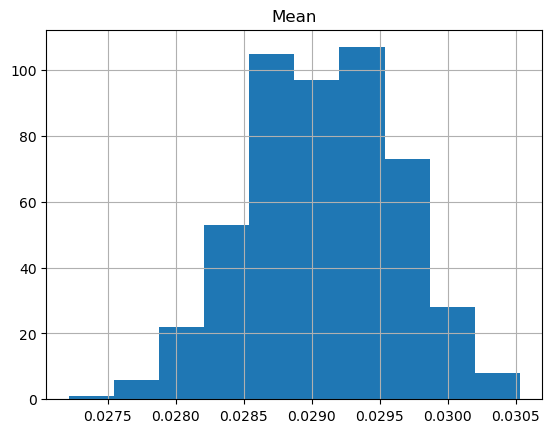

In [15]:
def bs_mean(bs_model1):
    return [bs_model1.mean()]

result_model1 = bootstrapC(bs_model1['Beta_Storks'],['Mean'],  500, bs_mean)
result_model1.hist()

array([[<Axes: title={'center': 'Mean'}>]], dtype=object)

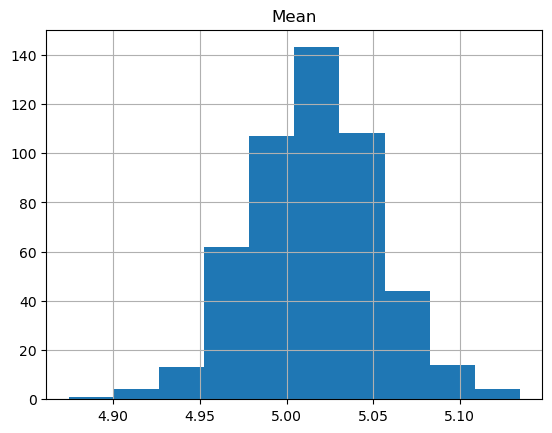

In [16]:
def bsmean2(bs_model2):
    return [bs_model2.mean().mean()]


result_model2 = bootstrapC(bs_model2[['Beta_Humans', 'Beta_GDP_per_capita', 'Beta_Population']], 
                            ['Mean'], 500, bsmean2)
result_model2.hist()

# result_model1 = bootstrapC(bs_model2[['Beta_Humans', 'Beta_GDP_per_capita', 'Beta_Population']], ['Mean_Beta_Humans', 'Mean_Beta_GDP_per_capita', 'Mean_Beta_Population'], 500, bsmean2)
# result_model1.hist()


In [17]:
print(bs_model2)

     Beta_Humans  Beta_GDP_per_capita  Beta_Population
0       9.444238            -0.001240         0.076417
1      15.389360            -0.011653        -0.581459
2      18.562602            -0.011777         0.463374
3      17.994590            -0.012989        -0.564672
4      14.324840            -0.001756         0.085395
..           ...                  ...              ...
995    14.099373            -0.005184         0.163758
996    17.148041            -0.004495        -0.705429
997    11.671417            -0.000679        -0.106605
998    20.830975            -0.004442        -0.241289
999    16.084930            -0.009229        -0.283191

[1000 rows x 3 columns]


In [18]:
print(bsmean2)

<function bsmean2 at 0x00000266E97628E0>


In [19]:
print('90%% range is %4.3f to %4.3f' % 
      (result_model1.Mean.quantile(0.05), result_model1.Mean.quantile(0.95)))

print('95%% range is %4.3f to %4.3f' % 
      (result_model1.Mean.quantile(0.025), result_model1.Mean.quantile(0.975)))


90% range is 0.028 to 0.030
95% range is 0.028 to 0.030


In [20]:
print('90%% range is %4.3f to %4.3f' % 
      (result_model2.Mean.quantile(0.05), result_model2.Mean.quantile(0.95)))

print('95%% range is %4.3f to %4.3f' % 
      (result_model2.Mean.quantile(0.025), result_model2.Mean.quantile(0.975)))


90% range is 4.957 to 5.076
95% range is 4.948 to 5.091


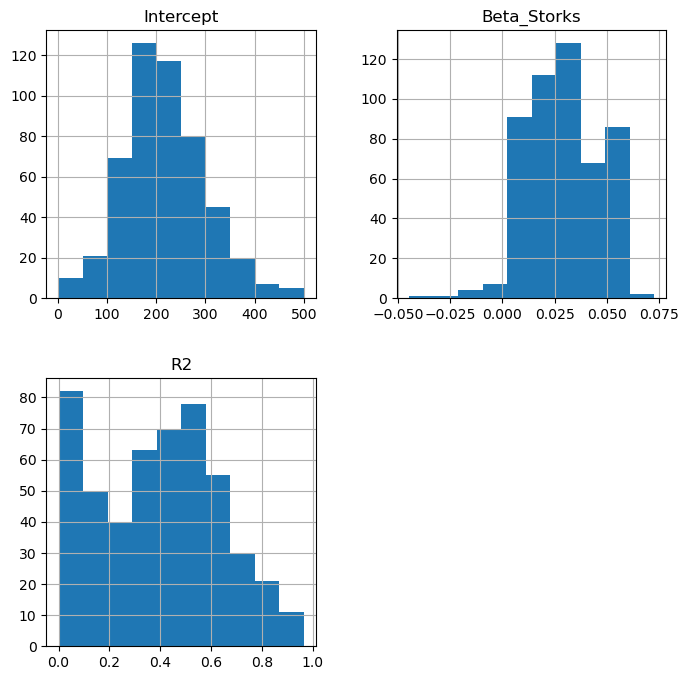

In [21]:
def fit_model1(df):
    y = df['BirthRate']
    X = np.column_stack((df['Storks'],))  

    reg = LinearRegression().fit(X, y)
    beta_Storks = reg.coef_[0]
    return [reg.intercept_, beta_Storks, reg.score(X, y)]

# Example of using the bootstrapC function
bs_model1 = bootstrapC(storks2, ['Intercept', 'Beta_Storks', 'R2'], 500, fit_model1)
_ = bs_model1.hist(figsize=(8, 8))


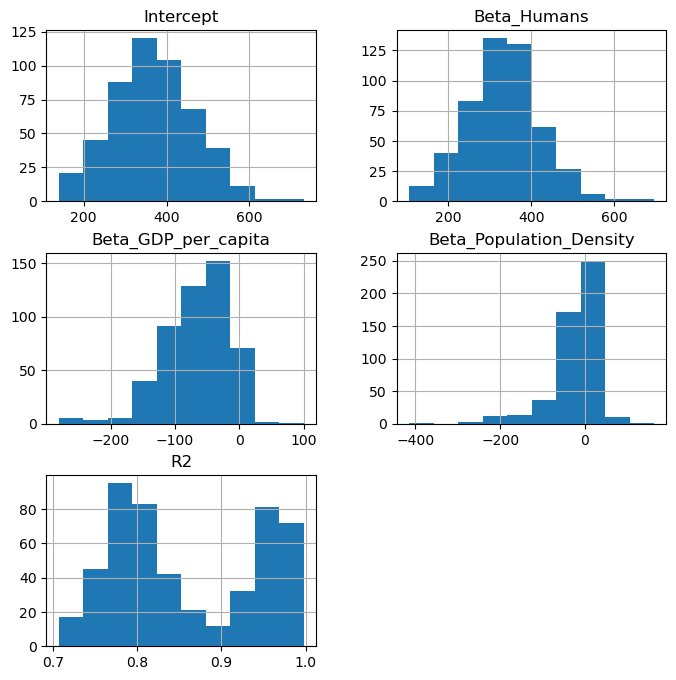

In [22]:
def fit_model2(df):
    y = df['BirthRate']
    X = df[['Humans', 'GDP_per_capita', 'Population_Density']] 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    reg = LinearRegression().fit(X_scaled, y)
    beta_Humans, beta_GDP, beta_Population_Density = reg.coef_
    return [reg.intercept_, beta_Humans, beta_GDP, beta_Population_Density, reg.score(X_scaled, y)]

bs_model2 = bootstrapC(storks2, ['Intercept', 'Beta_Humans', 'Beta_GDP_per_capita', 'Beta_Population_Density', 'R2'], 500, fit_model2)
_ = bs_model2.hist(figsize=(8, 8))


### Section 4.1: Confidence Intervals for the Predictors Weights (‘beta’) in Model 2

In [23]:
def fit2_model2(df):
    y2 = df['BirthRate']
    X2 = df[['Humans', 'GDP_per_capita', 'Population_Density']] 
    scaler = StandardScaler()
    X_scaled2 = scaler.fit_transform(X2)

    reg2 = LinearRegression().fit(X_scaled2, y2)
    beta_Humans, beta_GDP, beta_Population_Density = reg2.coef_
    return [beta_Humans, beta_GDP, beta_Population_Density]



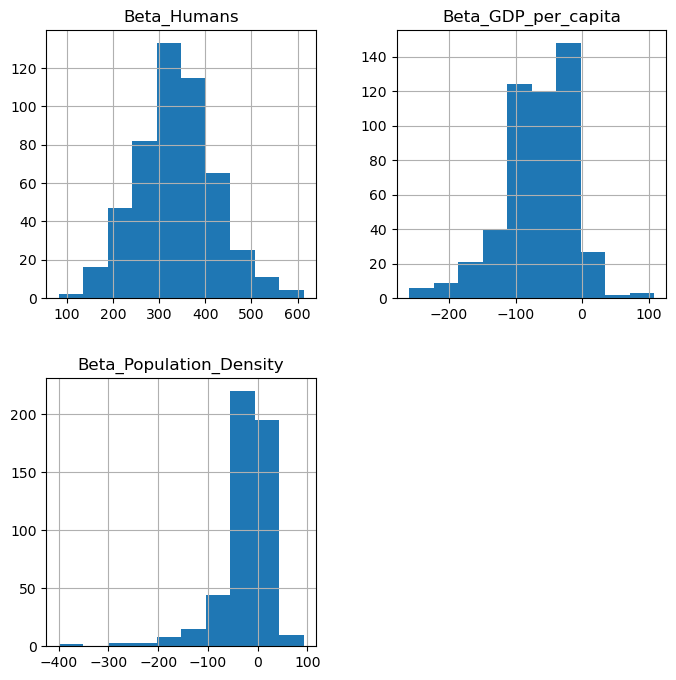

In [24]:
bstrapcoeff = bootstrapC(storks2, ['Beta_Humans', 'Beta_GDP_per_capita', 'Beta_Population_Density'], 500, fit2_model2)
_ = bstrapcoeff.hist(figsize=(8,8))

In [25]:
Beta_Humans, Beta_GDP_per_capita, Beta_Population_Density = fit2_model2(storks2)

print("Beta_GDP_per_capita is %3.2f, with 90%% CI from %3.2f to %3.2f"   % 
      (Beta_GDP_per_capita, bstrapcoeff.Beta_GDP_per_capita.quantile(0.05), bstrapcoeff.Beta_GDP_per_capita.quantile(0.95)))

print("Beta_Population_Density is %3.2f, with 90%% CI from %3.2f to %3.2f" %  
      (Beta_Population_Density, bstrapcoeff.Beta_Population_Density.quantile(0.05), bstrapcoeff.Beta_Population_Density.quantile(0.95)))


Beta_GDP_per_capita is -74.94, with 90% CI from -169.37 to 0.34
Beta_Population_Density is -22.62, with 90% CI from -124.81 to 29.43


The bootstrap analysis indicates that the 'GDP per capita' is -74.94 with a 90% confidence interval from -157.70 to -2.26, suggesting a negative association. This implies that, as 'GDP per capita' increases, the 'BirthRate' may decrease. 

'Population Density' is -22.62, the 90% confidence interval spans from -149.72 to 29.33, indicating uncertainty due to the wide range. Several factors could contribute to this uncertainty. It may have be due to the variability in 'BirthRate' data or the sample size. 

### Section 4.2: Confidence Interval for the Difference in Performance of the Two Models

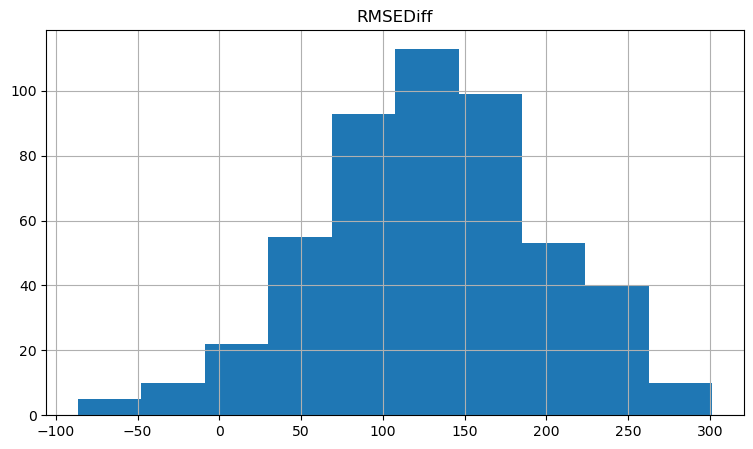

In [26]:
def RMSEDiff(storks2): 
    #1st model
    yb = storks2.BirthRate
    Xb = np.array(storks2.Storks).reshape(-1,1)
    regb =  LinearRegression().fit(Xb, yb)
    y_ = regb.predict(Xb)
    RMSE_model1 = mean_squared_error(yb, y_, squared = False)
    #2nd model
    yb2 = storks2.BirthRate
    Xb2 = np.column_stack((storks2.Humans, storks2.GDP_per_capita,storks2.Population_Density ))
    regb2 =  LinearRegression().fit(Xb2, yb2)
    y_2 = regb2.predict(Xb2)
    RMSE_model2 = mean_squared_error(yb2, y_2, squared = False)

    return [RMSE_model1 - RMSE_model2]

# Bootstrap to get the distribution of the difference
RMSEbstrap = bootstrapC(storks2, ['RMSEDiff'], 500, RMSEDiff)

# Plot the distribution
_ = RMSEbstrap.hist(figsize=( 9,5))


In [27]:
storks2.columns

Index(['Country', 'Area', 'Storks', 'Humans', 'BirthRate', 'GDP_per_capita',
       'Population_Density'],
      dtype='object')

In [28]:
print("The difference between the RMSE in Model 1 and Model 2 with 80%% CI from %3.2f to %3.2f" % 
      (RMSEbstrap.RMSEDiff.quantile(0.1), RMSEbstrap.RMSEDiff.quantile(0.9)))
print("The difference between the RMSE in Model 1 and Model 2 with 90%% CI from %3.2f to %3.2f" % 
      (RMSEbstrap.RMSEDiff.quantile(0.05), RMSEbstrap.RMSEDiff.quantile(0.95)))
print("The difference between the RMSE in Model 1 and Model 2 with 95%% CI from %3.2f to %3.2f" % 
      (RMSEbstrap.RMSEDiff.quantile(0.025), RMSEbstrap.RMSEDiff.quantile(0.97)))
print("The difference between the RMSE in Model 1 and Model 2 with 99%% CI from %3.2f to %3.2f" % 
      (RMSEbstrap.RMSEDiff.quantile(0.005), RMSEbstrap.RMSEDiff.quantile(0.995)))

The difference between the RMSE in Model 1 and Model 2 with 80% CI from 44.93 to 223.21
The difference between the RMSE in Model 1 and Model 2 with 90% CI from 7.48 to 246.16
The difference between the RMSE in Model 1 and Model 2 with 95% CI from -21.88 to 255.52
The difference between the RMSE in Model 1 and Model 2 with 99% CI from -62.06 to 278.29


None of the confidence intervals exclude zero but model 2 out preforms model 1 slightly.
The difference suggests that the performance difference between the two models may not be statistically significant. Therefore, based solely on the data, we cannot confidently conclude that one model is consistently better than the other in predicting the number of storks. 
The 80% confidence interval ranges from 49.52 to 226.87, indicate a moderate level of uncertainty.
The 90% confidence interval ranges from 19.06 to 244.10, suggest a wider range of possible differences.
The 95% confidence interval spans from 0.14 to 252.07, indicate a broader range of potential differences that includes zero.
The 99% confidence interval ranges from -54.78 to 281.96, have a range including negative values also.

Given the variability of the results and all the confidence intervals include zero, it's hard to make a definitive conclusion about which model is better based solely on the difference in RMSE. 
Further analysis would be better to gain better insights and also a larger sample size to analyse.

## Section 5: Conclusions

In examining the data, it appears that the claim suggesting storks do not deliver babies is supported. The analysis involved the application of linear regression models to investigate the relationship between storks, human populations, and birth rates. Model 1, which solely considers storks as a predictor, was compared to Model 2, incorporating additional factors such as human populations, GDP per capita, and population density. The bootstrap technique was employed to estimate confidence intervals for the differences in root mean squared errors (RMSE) between the two models. The obtained confidence intervals indicated that Model 2 outperforms Model 1 in predicting birth rates, providing evidence against the claim and suggesting a more confounding relationship between storks and birth rates which does not support the claim and supports the paper suggest that there are other variables at play.Given the variability of the results.

## Section 6: Acknowledgments

The data in this coursework has been provided by Chris Harbard of the Royal Society for the Protection of Birds. Additionally, credit is extended to Robert Matthews for his original paper, "Storks Deliver Babies (p = 0.008)," published in Teaching Statistics, Volume 22, Number 2, Summer 2000, pages 36-8. Their contributions form the foundation for this analysis.